In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [119]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [120]:
df.shape

(3554, 18)

In [121]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [122]:
df.shape

(3554, 18)

In [123]:
latlong = pd.read_csv('latlong.csv')

In [124]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [125]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [126]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [127]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [128]:
new_df = df.merge(latlong, on='sector')

In [129]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"28.4160° N, 76.9914° E",28.416,76.9914
1,flat,avl 36 gurgaon,sector 36,0.75,7500.0,2.0,2.0,2,5.0,Relatively New,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,"28.4160° N, 76.9914° E",28.416,76.9914
2,flat,signature global park 4,sector 36,1.00,9901.0,3.0,2.0,3,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,128.0,"28.4160° N, 76.9914° E",28.416,76.9914
3,flat,krisumi waterfall residences,sector 36,4.10,15501.0,3.0,4.0,3,30.0,New Property,...,1.0,0.0,0.0,0.0,0.0,2.0,49.0,"28.4160° N, 76.9914° E",28.416,76.9914
4,flat,signature global park 4,sector 36,0.72,6660.0,3.0,2.0,3,3.0,Under Construction,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4160° N, 76.9914° E",28.416,76.9914


In [130]:
new_df.shape

(3329, 21)

In [131]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [132]:
group_df = new_df.groupby("sector")[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()

In [133]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [134]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [135]:
new_df.to_csv('data_viz1.csv',index=False)

In [136]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [137]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Sector 103 Gurgaon,flat,signature global grand iva,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 6...,2,2,0,not available,"Sector 103, Sector 103 Gurgaon, Gurgaon, Haryana",10.0,North,undefined,"['Dwaraka Expy, Tikampur Village', 'Sector 108...",Best in class property available at sector 103...,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,"['Green Area5 out of 5', 'Construction5 out of..."
1,4 BHK Flat in DLF Phase 5,flat,dlf icon,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4,4,3+,not available,"Dlf City Phase 5, DLF Phase 5, Gurgaon, Haryana",18.0,NaN,undefined,"['Sector 53-54 metro station', 'Sector 42-43 m...",Best in class property available at dlf city p...,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment5 out of 5', 'Lifestyle5 out of 5..."
2,10 Bedroom House for sale in Bhondsi,house,independent,1.35,3857.0,3500.0,Plot area 3500(325.16 sq.m.),10,6,3+,not available,"Bhondsi, Gurgaon, Bhondsi, Gurgaon, Haryana",3.0,NaN,10+ Year Old,NaN,Check out this 10 bhk independent house for sa...,NaN,NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
3,2 BHK Flat in Sector 74 Gurgaon,flat,m3m skywalk,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up...,2,2,3+,others,"T1-1111, Sector 74 Gurgaon, Gurgaon, Haryana",18.0,South,1 to 5 Year Old,"['Omaxe Gurgaon Mall', 'Omaxe Celebration Mall...",This lovely 2 bhk apartment/flat in sector 74 ...,NaN,"['Centrally Air Conditioned', 'Security / Fire...",NaN
4,4 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,"pooja room,study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",2.0,North-East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, g block, dlf phase-1, gurga...","['10 Light', 'No AC', 'No Bed', 'No Chimney', ...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN


In [138]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [139]:
wordcloud_df.head()

,features,sector
0,NaN,sector 36
1,NaN,sector 89
2,NaN,sohna road
3,"['Centrally Air Conditioned', 'Security / Fire...",sector 92
4,"['Feng Shui / Vaastu Compliant', 'High Ceiling...",sector 102


In [140]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [141]:
main

['Centrally Air Conditioned',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'Water Storage',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Water softening plant',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Feng Shui / Vaastu Compliant',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Visitor Parking',
 'Park',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Recently Renovated',
 

In [142]:
from wordcloud import WordCloud

In [143]:
feature_text = ' '.join(main)

In [144]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [145]:
feature_text

'Centrally Air Conditioned Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) High Ceiling Height Maintenance Staff Water Storage No open drainage around Bank Attached Property Piped-gas Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Feng Shui / Vaastu Compliant High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Visitor Parking Park Low Density Society Waste Disposal Rain Water Harvesting Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Recently Renovated Piped-gas Visitor Parking Swimming Pool Park Natural Light Airy Rooms Low Density Society Shopping Centre Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house /

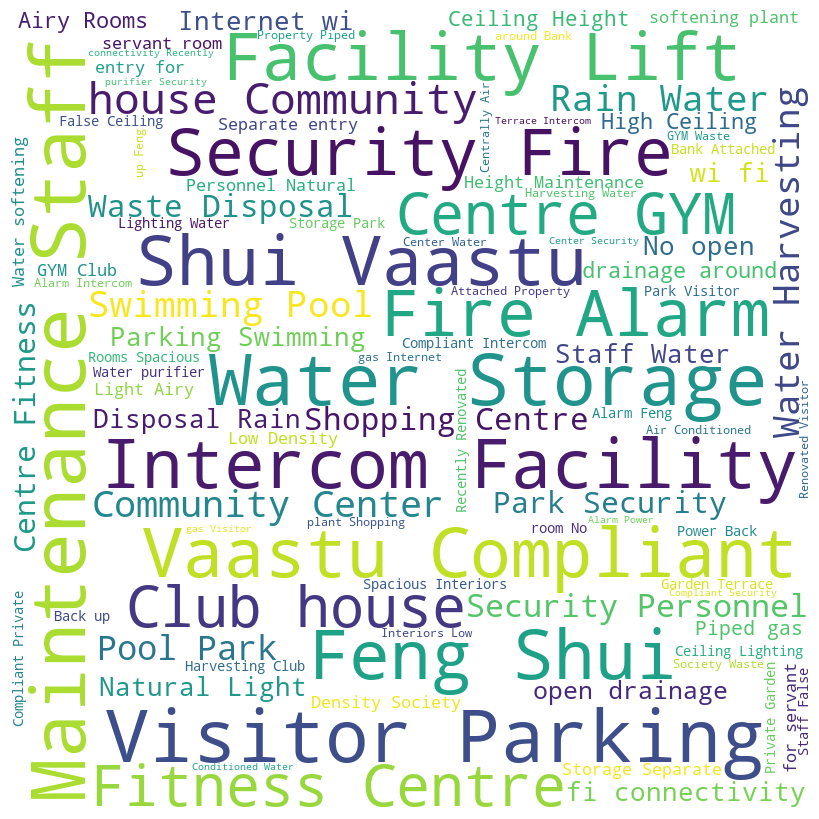

In [146]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    3961 non-null   object 
 1   property_type    3961 non-null   object 
 2   society          3960 non-null   object 
 3   price            3941 non-null   float64
 4   price_per_sqft   3941 non-null   float64
 5   area             3941 non-null   float64
 6   areaWithType     3961 non-null   object 
 7   bedRoom          3961 non-null   int64  
 8   bathroom         3961 non-null   int64  
 9   balcony          3961 non-null   object 
 10  additionalRoom   3961 non-null   object 
 11  address          3950 non-null   object 
 12  floorNum         3940 non-null   float64
 13  facing           2784 non-null   object 
 14  agePossession    3960 non-null   object 
 15  nearbyLocations  3754 non-null   object 
 16  description      3961 non-null   object 
 17  furnishDetails

In [160]:
# Sample data
data = dict(
    character=['A', 'B', 'C', 'D', 'E', 'F'],
    parent=['', 'A', 'A', 'B', 'C', 'C'],
    value=[10, 15, 7, 10, 5, 10]
)

# Creating Sunburst chart
fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value'
)

# Show the plot
fig.show()


In [161]:
fig = px.sunburst(
    df1,
    names='name',
    values='price_per_sqft',
    parents='features',
    title="Sample Sunburst Chart"
)
fig.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['property_name', 'property_type', 'society', 'price', 'price_per_sqft', 'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'address', 'floorNum', 'facing', 'agePossession', 'nearbyLocations', 'description', 'furnishDetails', 'features', 'rating'] but received: name

In [148]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [149]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [150]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16048\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP\AppData\Local\Temp\ipykernel_16048\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

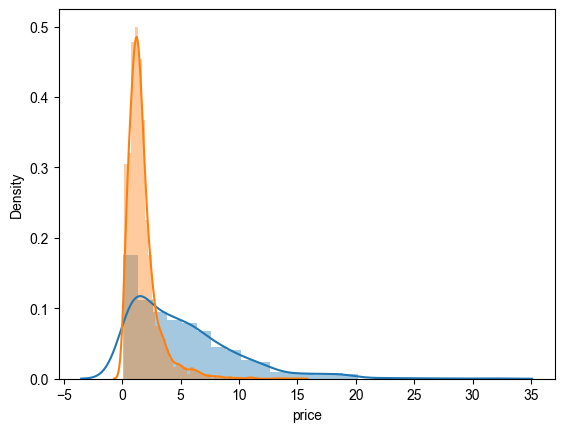

In [151]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [152]:
new_df['sector'].unique().tolist().insert(0,'overall')